# CNN model to detect wheat diseases

## Pre-requisites

### Importing libraries

In [4]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Setting the paths of the dataset and images to be classified

In [5]:
dataset_path = 'cropDiseaseDataset'
klass_dir = 'testCDD'

### Setting the parameters 

In [6]:
img_size = 64
num_classes = 4
batch_size = 32

### Creating the image and the labels

In [7]:
from sklearn.preprocessing import LabelBinarizer

def load_dataset():
    images = []
    lables = []

    classes = os.listdir(dataset_path)
    lable_binarizer = LabelBinarizer()

    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)

        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)

                try:
                    image = cv2.imread(image_path)
                    if image is not None:
                        image = cv2.resize(image, (img_size, img_size))
                        images.append(image)
                        lables.append(class_name)

                    else:
                        print("skipping invalid image")
                except Exception as e:
                    print("error on loadng class", class_path)  

    lables = lable_binarizer.fit_transform(lables)
    return images, lables
    


Images that are not in the correct format are skipped.

In [8]:
images, labels = load_dataset()
print(images[:5], labels[:5])

skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
skipping invalid image
[array([[[197, 204, 207],
        [198, 205, 208],
        [198, 205, 208],
        ...,
        [202, 207, 210],
        [200, 207, 210],
        [202, 208, 211]],

       [[197, 204, 207],
        [198, 205, 208],
        [197, 204, 207],
        ...,
        [202, 207, 210],
        [200, 207, 210],
        [202, 208, 211]],

       [[200, 205, 208],
        [200, 205, 208],
        [200, 205, 208],
        ...,
        [202, 207, 210],
        [203, 208, 211],
        [201, 206, 209]],

       ...,

       [[195, 200, 203],
        [196, 201, 204],
        [203, 207, 211],
  

The arrays assigned for the 4 labels are as follows:
Crown root rot - 0010, Healthy - 0001, Leaf rust - 1000, Loose smut - 0100

In [ ]:
for i in labels:
    print(i)

### Preprocessing the dataset

In [9]:
def preprocess_dataset(images, labels):
    images = np.array(images)
    images = images.astype('float32') / 255.0
    labels = np.array(labels)
    return images, labels

In [10]:
images, labels = preprocess_dataset(images, labels)

The labels after preprocessing are stored as a NumPy array

In [11]:
print(labels[:5])

[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]


## Creating the Convolutional Neural Network (CNN)

### Splitting the data into a training and testing set 

In [13]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

### Creating the CNN model

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))


### Compiling the CNN model

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Augmenting the training data 

In [18]:
data_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator.fit(train_images)

### Training the model with the training data

The history variable stores the values of accuracy and loss after each epoch, which are then used to plot the graph

In [19]:
history = model.fit(data_generator.flow(train_images, train_labels, batch_size=batch_size), steps_per_epoch=len(train_images) // batch_size, epochs=50)

Epoch 1/50
84/84 [==============================] - 10s 108ms/step - loss: 1.1229 - accuracy: 0.4891
Epoch 2/50
84/84 [==============================] - 8s 92ms/step - loss: 0.9839 - accuracy: 0.5838
Epoch 3/50
84/84 [==============================] - 7s 82ms/step - loss: 0.9217 - accuracy: 0.6165
Epoch 4/50
84/84 [==============================] - 7s 87ms/step - loss: 0.8854 - accuracy: 0.6342
Epoch 5/50
84/84 [==============================] - 8s 92ms/step - loss: 0.8574 - accuracy: 0.6530
Epoch 6/50
84/84 [==============================] - 6s 77ms/step - loss: 0.8278 - accuracy: 0.6617
Epoch 7/50
84/84 [==============================] - 7s 85ms/step - loss: 0.8133 - accuracy: 0.6692
Epoch 8/50
84/84 [==============================] - 8s 100ms/step - loss: 0.7891 - accuracy: 0.6812
Epoch 9/50
84/84 [==============================] - 11s 133ms/step - loss: 0.7630 - accuracy: 0.6887
Epoch 10/50
84/84 [==============================] - 8s 98ms/step - loss: 0.7540 - accuracy: 0.6921
Epoc

### The graphs of accuracy and loss after each epoch are plotted

These graphs show a logarithmic trend

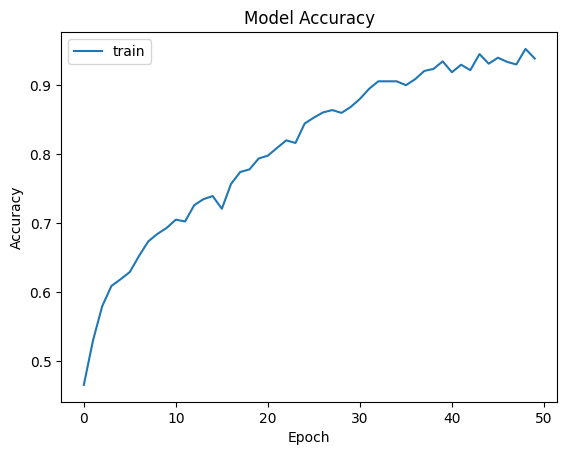

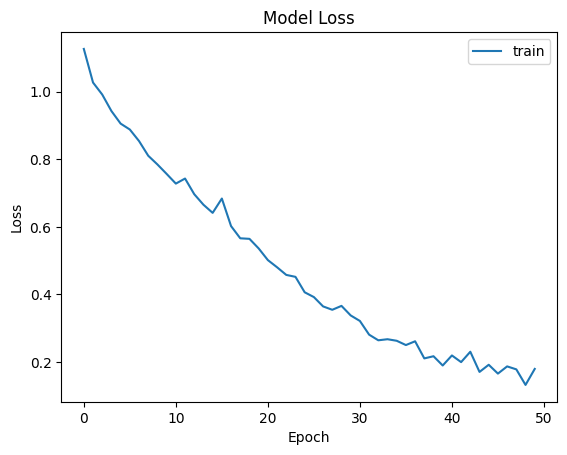

In [15]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Evaluating the model

The model's loss and accuracy is evaluted against the test data

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

22/22 [==============================] - 3s 60ms/step - loss: 0.3815 - accuracy: 0.9080
Test Loss: 0.3815496563911438
Test Accuracy: 0.9080118536949158


A testing accuracy of 83% indicates that the model is accurate

## Classifying images 

### Initializing the arrays

In [17]:
images_to_be_classified = os.listdir(klass_dir)
resized_images = []

### Preprocessing the images

This is done to make the images compatible with the model, as it can function accurately only if a particular format of images is used

In [18]:
for image_name in images_to_be_classified:
    # Construct the full path to the image
    image_path = os.path.join(klass_dir, image_name)
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Resize the image
    resized_image = cv2.resize(image, (img_size, img_size))
    # Append the resized image to the list
    resized_images.append(resized_image)

In [19]:
resized_images = np.array(resized_images)

In [20]:
resized_images = resized_images / 255.0

### Predicting image labels

In [21]:
predictions = model.predict(resized_images)

1/1 [==============================] - 0s 210ms/step


### Printing image names along with their corresponding labels

The labels with their corresponding arrays are as follows:
Crown root rot - 0010, Healthy - 0001, Leaf rust - 1000, Loose smut - 0100

In [22]:
for i in range(len(images_to_be_classified)):
    image_name = images_to_be_classified[i]
    prediction = predictions[i]
    rounded_prediction = (np.round(prediction))
    print("Image:", image_name, "Predicted Label:", rounded_prediction)

Image: 000003 (2).jpg Predicted Label: [1. 0. 0. 0.]
Image: crr_1.jpg Predicted Label: [0. 0. 1. 0.]
Image: crr_2.jpg Predicted Label: [0. 0. 1. 0.]
Image: h_1.jpg Predicted Label: [0. 0. 0. 1.]
Image: h_2.jpg Predicted Label: [0. 1. 0. 0.]
Image: images (1).jpg Predicted Label: [0. 0. 1. 0.]
Image: images.jpg Predicted Label: [0. 1. 0. 0.]
Image: istockphoto-1358387551-612x612.jpg Predicted Label: [1. 0. 0. 0.]
Image: istockphoto-182175441-612x612.jpg Predicted Label: [0. 0. 0. 1.]
Image: lr_1.jpg Predicted Label: [1. 0. 0. 0.]
Image: lr_2.jpg Predicted Label: [0. 0. 1. 0.]
Image: ls_1.jpg Predicted Label: [0. 1. 0. 0.]
Image: ls_2.jpg Predicted Label: [0. 1. 0. 0.]
Image: user.png Predicted Label: [0. 0. 1. 0.]


It is observed that out of the 8 images, 6 images are correctly identified.

### Saving the model

The model is saved as an H5 file. This format is used as both weights and model configuration can be stored in the same file.

In [23]:
model.save('wheatDiseaseModel.h5')

In [24]:
import tensorflow as tf

# Load your model
model = tf.keras.models.load_model('wheatDiseaseModel.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the .tflite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Rose\AppData\Local\Temp\tmpq3clio72\assets


INFO:tensorflow:Assets written to: C:\Users\Rose\AppData\Local\Temp\tmpq3clio72\assets
